In [4]:
import os, sys
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR

In [5]:
def unpacker(df, key, num_exp=3, num_rounds=300, idx=0):
    result = []

    for i in range(num_rounds):
        single_elem = []
        for j in range(num_exp):
            single_elem.append(list(df[key])[j * (num_rounds * num_exp) + i * 3 + idx])
        # print(single_elem)
        # single_elem = round(sum(single_elem)/num_exp, 3)
        result.append(single_elem)
    result = torch.Tensor(result)
    mean = result.mean(dim=1)
    under = mean - result.std(dim=1)
    upper = mean + result.std(dim=1)

    mean, under, upper = mean.tolist(), under.tolist(), upper.tolist()
    return mean, under, upper

In [16]:
def plotter():
    
    p0 = f'./log/gihun/rapid recovery/[cifarcnn-cifar10]rapid_iid_09/results.csv'
    p1 = f'./log/gihun/rapid recovery/[cifarcnn-cifar10]rapid_noniid_09/results.csv'
        
    df0, df1 = pd.read_csv(p0), pd.read_csv(p1)
    
    cost0, cost1 = unpacker(df0, 'Cost'), unpacker(df1, 'Cost')
    sparsity0, sparsity1 = unpacker(df0, 'sparsity'), unpacker(df1, 'sparsity')
    acc0, acc1 = unpacker(df0, 'ACC', idx=2), unpacker(df1, 'ACC', idx=2)
    tr_loss0, tr_loss1 = unpacker(df0, 'Loss', idx=0), unpacker(df1, 'Loss', idx=0)
    te_loss0, te_loss1 = unpacker(df0, 'Loss', idx=1), unpacker(df1, 'Loss', idx=1)
    
    rounds = [x + 1 for x in range(300)]
    
    
    fig = plt.figure(figsize=(8, 6))
    plt.yticks([10 * x for x in range(10)], fontsize=15)
    plt.xticks([50 * x for x in range(7)], fontsize=15)

    # Local Pruning
    plt.plot(rounds, acc0[0], label='IID', lw=2, color='orangered', alpha=1)
    plt.fill_between(rounds, acc0[1], acc0[2], color='orangered', alpha=0.2)

    # Local Pruning Half
    plt.plot(rounds, acc1[0], label='Non-IID', lw=2, color='orange', alpha=1)
    plt.fill_between(rounds, acc1[1], acc1[2], color='orange', alpha=0.2)


    # plt.plot(, label='Pruning', lw=5, color='blue')
    plt.xlabel('Round', fontsize=20)
    plt.ylabel('Accuracy (%)', fontsize=20)
    plt.xlim(0, 300)
    plt.ylim(0, 80)
    plt.legend(fontsize=18, loc='lower right')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.grid()
    
    fig = plt.figure(figsize=(8, 6))
    plt.xticks([50 * x for x in range(7)], fontsize=15)
    plt.yticks([0.5 * y for y in range(11)], fontsize=15)

    # baseline
    plt.plot(rounds, te_loss0[0], label='IID', lw=2, color='orangered', alpha=1)
    plt.fill_between(rounds, te_loss0[1], te_loss0[2], color='orangered', alpha=0.1)
    plt.plot(rounds, tr_loss0[0], lw=2, color='orangered', alpha=0.5, linestyle='--')

    # Local Pruning
    plt.plot(rounds, te_loss1[0], label='Non-IID', lw=2, color='orange', alpha=1)
    plt.fill_between(rounds, te_loss1[1], te_loss1[2], color='orange', alpha=0.1)
    plt.plot(rounds, tr_loss1[0], lw=2, color='orange', alpha=0.5, linestyle='--')

    # plt.plot(, label='Pruning', lw=5, color='blue')
    plt.xlabel('Round', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.xlim(0, 300)
    plt.ylim(0, 3)
    plt.legend(fontsize=18, loc='upper right')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.grid()


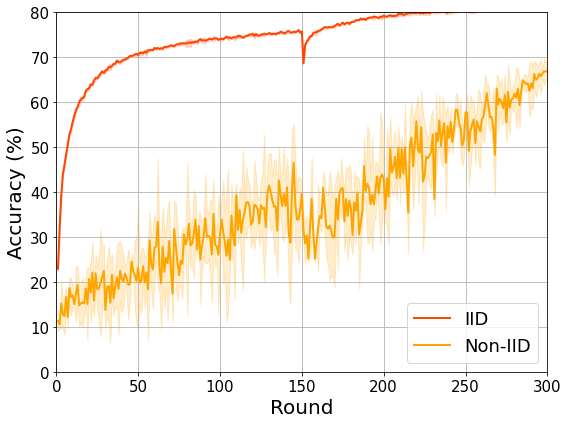

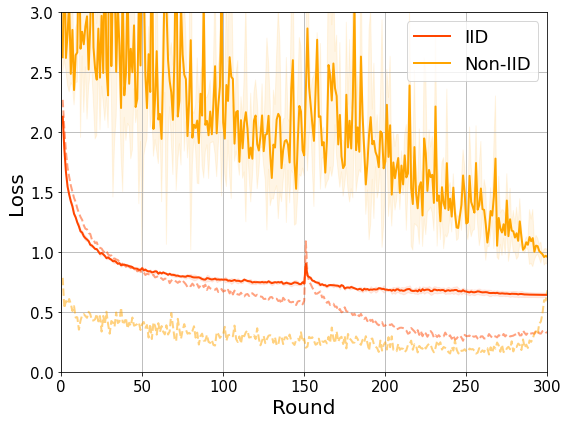

In [17]:
plotter()

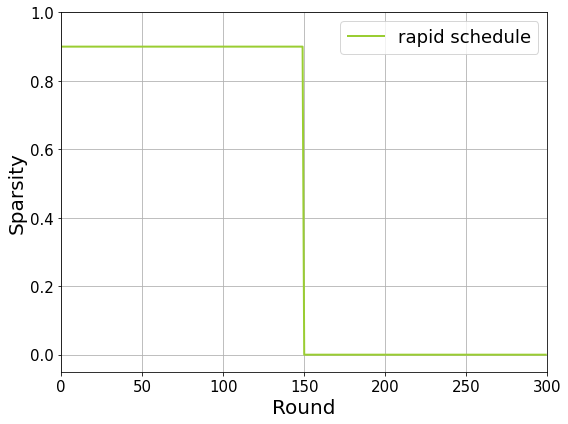

In [26]:
rounds = [i for i in range(300)]
x1 = [0.9 if i < 150 else 0 for i in range(300) ]
fig = plt.figure(figsize=(8, 6))
plt.xticks([50 * x for x in range(7)], fontsize=15)
plt.yticks([0.2 * y for y in range(11)], fontsize=15)

plt.plot(rounds, x1, label='rapid schedule', lw=2, color='yellowgreen', alpha=1)
plt.xlabel('Round', fontsize=20)
plt.ylabel('Sparsity', fontsize=20)
plt.xlim(0, 300)
plt.ylim(-0.05, 1)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
